In [36]:
from datasets import load_dataset



### Aya Dataset

***Description from [HuggingFace](https://huggingface.co/datasets/CohereForAI/aya_dataset):***
    The Aya Dataset is a multilingual instruction fine-tuning dataset curated by an open-science community via Aya Annotation Platform from Cohere For AI. The dataset contains a total of 204k human-annotated prompt-completion pairs along with the demographics data of the annotators.

In [37]:
aya_dataset = load_dataset("CohereForAI/aya_dataset")
aya_dataset

Found cached dataset parquet (/Users/shilpabhandari/.cache/huggingface/datasets/CohereForAI___parquet/default-6eb8c9aa31bd0f06/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 202362
    })
    test: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 1750
    })
})

In [38]:
aya_nepali = aya_dataset.filter(lambda example: example['language'] == "Nepali")
aya_nepali

Loading cached processed dataset at /Users/shilpabhandari/.cache/huggingface/datasets/CohereForAI___parquet/default-6eb8c9aa31bd0f06/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-d672217db7d5cde1.arrow
Loading cached processed dataset at /Users/shilpabhandari/.cache/huggingface/datasets/CohereForAI___parquet/default-6eb8c9aa31bd0f06/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-cf8d2ce67696ddc3.arrow


DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 4002
    })
    test: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 0
    })
})

In [39]:
import pandas as pd
nepali_train_df = pd.DataFrame(aya_nepali['train'])


In [40]:
nepali_test_df = pd.DataFrame(aya_nepali['test'])

In [41]:
print(nepali_test_df.head())

Empty DataFrame
Columns: []
Index: []


In [42]:
print(nepali_train_df['annotation_type'].value_counts())


original-annotations    3257
re-annotations           745
Name: annotation_type, dtype: int64


In [43]:
#performing sentiment analysis of Nepali input data in aya 
from textblob import TextBlob


In [44]:
# Calculate sentiment polarity for prompts and completions
nepali_train_df['input_sentiment'] = nepali_train_df['inputs'].apply(lambda x: TextBlob(x).sentiment.polarity)



In [45]:
nepali_train_df['target_sentiment'] = nepali_train_df['targets'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Basic statistics
#print(nepali_train_df[['input_sentiment', 'target_sentiment']].describe())
#print(nepali_test_df[['input_sentiment', 'target_sentiment']].describe())

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


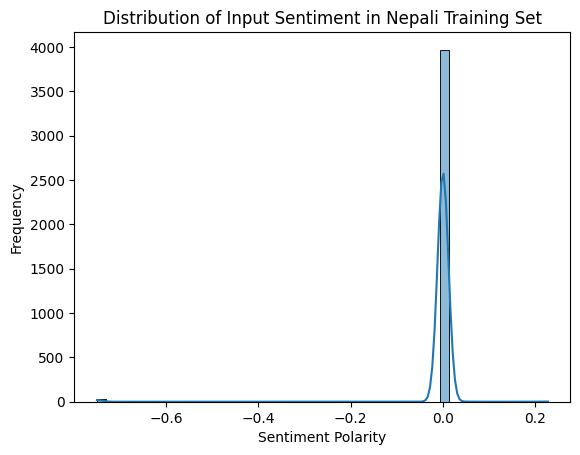

In [47]:
# Visualization of sentiment distribution of input in Nepali training set -Aya
sns.histplot(nepali_train_df['input_sentiment'], bins=50, kde=True)
plt.title('Distribution of Input Sentiment in Nepali Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

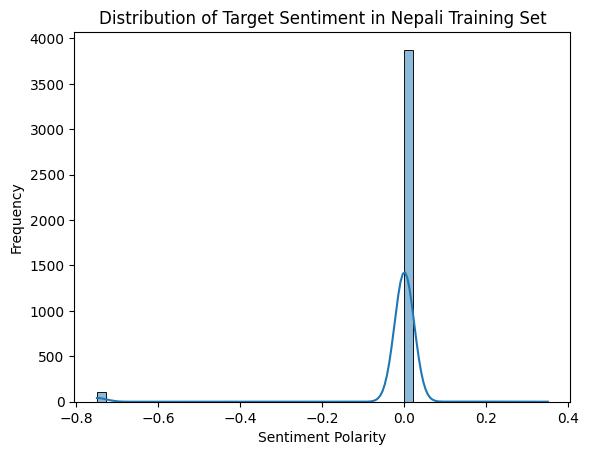

In [48]:
#performing sentiment analysis of Nepali output data in aya 



sns.histplot(nepali_train_df['target_sentiment'], bins=50, kde=True)
plt.title('Distribution of Target Sentiment in Nepali Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()




In [49]:
print(aya_nepali['train']['inputs'][1])

दिइएको कवितांश पढ्नुहोस्‌ र सङ्क्षिप्त उत्तर लेख्नुहोस्‌ :

डिगर्चामा डोब तिम्रो चिसो हिउँभित्र होला वेत्रावती किनारभरि पौरखको
चिनो होला वीर पुर्खा! तिमीलाई मितेरीले मात्र बाँध्यो सागर तरी
संसारभरि वीर गोर्खा रगत बग्यो।

प्रश्न : हामीले हाम्रा पुर्खाको गौरव कसरी जोगाउन सक्छौं ?



In [50]:
print(aya_nepali['train']['targets'][1])


उत्तरः पुर्खाले गरेको त्याग, तपस्या र बलिदानको उच्च सम्मान गर्दै एवम्‌
देशभक्तिपूर्ण बाटोलाई तन, मन, वचन तथा कर्मले आत्मसात्‌ गरी हाम्रा
पुर्खाको गौरव जोगाउन सक्छौं ।




In [51]:
empty_text = aya_nepali.filter(lambda example: example['inputs'] == "" or example['targets'] == "")
empty_text

Loading cached processed dataset at /Users/shilpabhandari/.cache/huggingface/datasets/CohereForAI___parquet/default-6eb8c9aa31bd0f06/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-72fb452bdcca2f98.arrow


DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 0
    })
    test: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 0
    })
})

In [52]:
avg_inputs_len = sum(len(text.split()) for text in aya_nepali['train']['inputs']) / len(aya_nepali['train']['inputs'])
avg_outputs_len = sum(len(text.split()) for text in aya_nepali['train']['targets']) / len(aya_nepali['train']['targets'])
(avg_inputs_len, avg_outputs_len)

(14.914042978510745, 40.942278860569715)

In [53]:
aya_hindi = aya_dataset.filter(lambda example: example['language'] == "Hindi")
aya_hindi

Loading cached processed dataset at /Users/shilpabhandari/.cache/huggingface/datasets/CohereForAI___parquet/default-6eb8c9aa31bd0f06/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-225d21a4a9f65694.arrow
Loading cached processed dataset at /Users/shilpabhandari/.cache/huggingface/datasets/CohereForAI___parquet/default-6eb8c9aa31bd0f06/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-f5c9d984c99e50a8.arrow


DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 1153
    })
    test: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 0
    })
})

In [54]:
print(aya_hindi['train']['inputs'][1])

दाल मखनी कैसे बनाते हैं?


In [55]:
print(aya_hindi['train']['targets'][1])

दाल मखनी बनाने के लिए सबसे पहले काली उरद दाल और राजमा को रात भर भिगो दें। फिर इसे प्रेशर कुकर में पकाएं। एक पैन में मक्खन गरम करें, जीरा, अदरक-लहसुन का पेस्ट, प्याज, टमाटर, मिर्च पाउडर, और गरम मसाला डालकर भुनें। पकी हुई दाल और राजमा को इसमें मिलाएं और धीमी आंच पर पकने दें। क्रीम मिलाकर गाढ़ा होने तक पकाएं।


In [56]:
hindi_train_df = pd.DataFrame(aya_hindi['train'])


In [57]:
hindi_train_df['input_sentiment'] = hindi_train_df['inputs'].apply(lambda x: TextBlob(x).sentiment.polarity)
hindi_train_df['target_sentiment'] = hindi_train_df['targets'].apply(lambda x: TextBlob(x).sentiment.polarity)


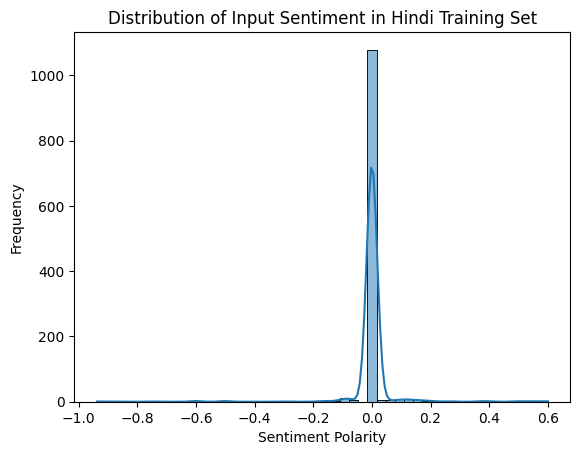

In [58]:
#performing sentiment analysis of Hindi input data in aya 

# Visualization of sentiment distribution
sns.histplot(hindi_train_df['input_sentiment'], bins=50, kde=True)
plt.title('Distribution of Input Sentiment in Hindi Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

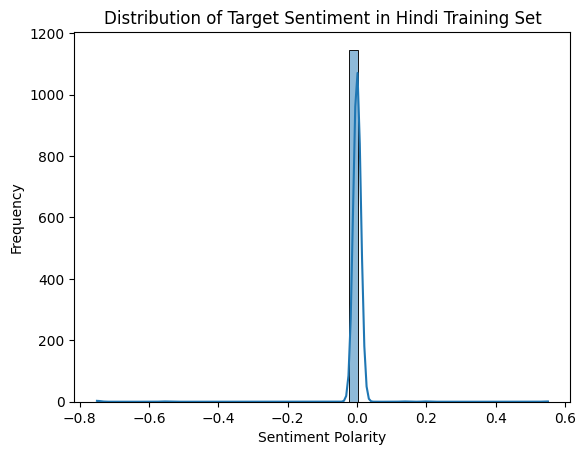

In [59]:

#performing sentiment analysis of Hindi output data in aya 


sns.histplot(hindi_train_df['target_sentiment'], bins=50, kde=True)
plt.title('Distribution of Target Sentiment in Hindi Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()




In [60]:
empty_text = aya_hindi.filter(lambda example: example['inputs'] == "" or example['targets'] == "")
empty_text

Loading cached processed dataset at /Users/shilpabhandari/.cache/huggingface/datasets/CohereForAI___parquet/default-6eb8c9aa31bd0f06/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-f53f9ea97ba6fe5e.arrow


DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 0
    })
    test: Dataset({
        features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
        num_rows: 0
    })
})

In [61]:
avg_inputs_len = sum(len(text.split()) for text in aya_hindi['train']['inputs']) / len(aya_hindi['train']['inputs'])
avg_outputs_len = sum(len(text.split()) for text in aya_hindi['train']['targets']) / len(aya_hindi['train']['targets'])
(avg_inputs_len, avg_outputs_len)

(23.617519514310494, 80.50910667823071)

There are only 4002 and 1153 samples for Nepali and Hindi, respectively. We can do few-shot experiments with those. We will have to see if it is enough for LoRA. Else, we will use Alpaca datasets translated into Nepali and Hindi.

### Alpaca Dataset

Alpaca Dataset is 52K instruction-following data by Stanford. We will be using the translated version of [Alpaca Clean](https://huggingface.co/datasets/yahma/alpaca-cleaned): 
- [Nepali](https://huggingface.co/datasets/Saugatkafley/alpaca-nepali-sft)
- [Hindi](https://huggingface.co/datasets/iamshnoo/alpaca-cleaned-hindi) - Translated from yahma/alpaca-cleaned using NLLB-1.3B


In [62]:
alpaca_nepali = load_dataset("Saugatkafley/alpaca-nepali-sft")
alpaca_nepali

Found cached dataset parquet (/Users/shilpabhandari/.cache/huggingface/datasets/Saugatkafley___parquet/Saugatkafley--alpaca-nepali-sft-6a244182611019ca/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output', 'id'],
        num_rows: 52005
    })
})

In [63]:
print(alpaca_nepali['train']['instruction'][1])

तीन प्राथमिक रंगहरू के हुन्?


In [64]:
print(alpaca_nepali['train']['input'][1])

In [65]:
print(alpaca_nepali['train']['output'][1])

तीन प्राथमिक रंगहरू रातो, नीलो र पहेंलो हुन्।


In [78]:
nepali_train_alpaca_df = pd.DataFrame(alpaca_nepali['train'])


In [79]:
nepali_train_alpaca_df
nepali_train_alpaca_df['input'] = nepali_train_alpaca_df['input'].fillna('')
nepali_train_alpaca_df['output'] = nepali_train_alpaca_df['output'].fillna('')


In [80]:
nepali_train_alpaca_df['input_sentiment'] = nepali_train_alpaca_df['input'].apply(lambda x: TextBlob(x).sentiment.polarity)
nepali_train_alpaca_df['target_sentiment'] = nepali_train_alpaca_df['output'].apply(lambda x: TextBlob(x).sentiment.polarity)


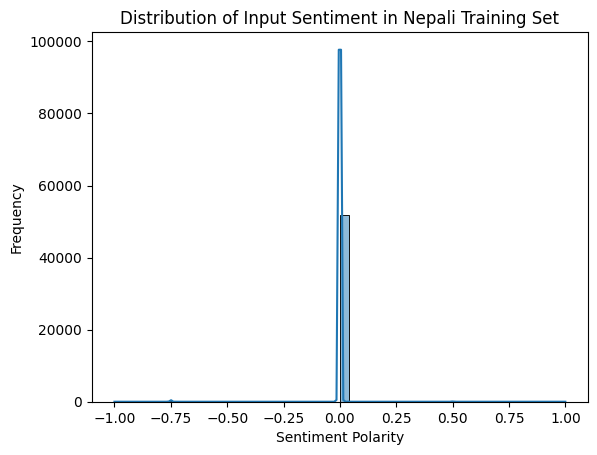

In [94]:

#performing sentiment analysis of Nepali input data in aya 


sns.histplot(nepali_train_alpaca_df['input_sentiment'], bins=50, kde=True)
plt.title('Distribution of Input Sentiment in Nepali Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()




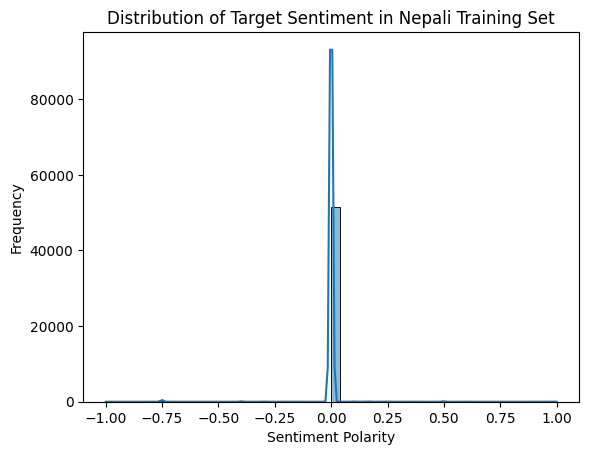

In [81]:

#performing sentiment analysis of Nepali output data in aya 


sns.histplot(nepali_train_alpaca_df['target_sentiment'], bins=50, kde=True)
plt.title('Distribution of Target Sentiment in Nepali Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()




In [ ]:
empty_text = alpaca_nepali.filter(lambda example: example['input'] == "" or example['output'] == "" or example['instruction'] == "")
empty_text

In [ ]:
empty_text = alpaca_nepali.filter(lambda example: example['instruction'] is None)
empty_text

In [ ]:
empty_text = alpaca_nepali.filter(lambda example: example['instruction'] == "" or example['instruction'] is None)
empty_text

In [ ]:
empty_text = alpaca_nepali.filter(lambda example: example['output'] == "" or example['output'] is None)
empty_text

In [ ]:
alpaca_nepali_filtered = alpaca_nepali.filter(lambda example: example['output'] is not None and example['output'] != "")
alpaca_nepali_filtered = alpaca_nepali_filtered.filter(lambda example: example['instruction'] != "" and example['instruction'] is not None)
alpaca_nepali_filtered = alpaca_nepali_filtered.filter(lambda example: example['input'] is not None)
alpaca_nepali_filtered

In [ ]:
avg_inst_len = sum(len(text.split()) for text in alpaca_nepali_filtered['train']['instruction']) / len(alpaca_nepali_filtered['train']['instruction'])
avg_inputs_len = sum(len(text.split()) for text in alpaca_nepali_filtered['train']['input']) / len(alpaca_nepali_filtered['train']['input'])
avg_outputs_len = sum(len(text.split()) for text in alpaca_nepali_filtered['train']['output']) / len(alpaca_nepali_filtered['train']['output'])
(avg_inst_len, avg_inputs_len, avg_outputs_len)

In [71]:
alpaca_hindi = load_dataset("iamshnoo/alpaca-cleaned-hindi")
alpaca_hindi

Found cached dataset parquet (/Users/shilpabhandari/.cache/huggingface/datasets/iamshnoo___parquet/iamshnoo--alpaca-cleaned-hindi-aa94c73065358e71/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['input', 'instruction', 'output'],
        num_rows: 51760
    })
})

In [ ]:
print(alpaca_hindi['train']['instruction'][1])

In [ ]:
print(alpaca_hindi['train']['input'][1])

In [ ]:
print(alpaca_hindi['train']['output'][1])

In [90]:
hindi_train_alpaca_df = pd.DataFrame(alpaca_hindi['train'])


In [91]:
hindi_train_alpaca_df['input'] = hindi_train_alpaca_df['input'].fillna('')
hindi_train_alpaca_df['output'] = hindi_train_alpaca_df['output'].fillna('')



In [92]:
hindi_train_alpaca_df['input_sentiment'] = hindi_train_alpaca_df['input'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [93]:
hindi_train_alpaca_df['target_sentiment'] = hindi_train_alpaca_df['output'].apply(lambda x: TextBlob(x).sentiment.polarity)


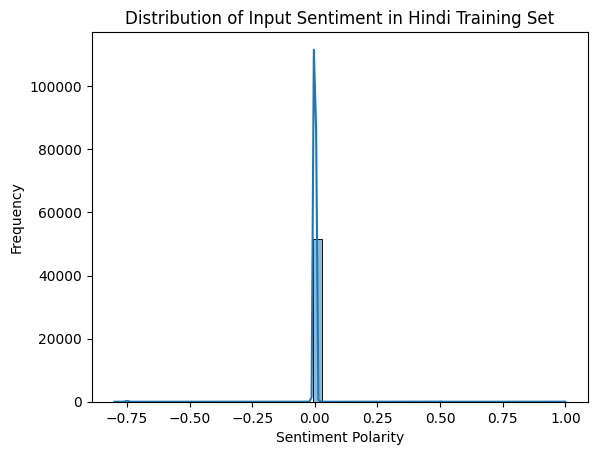

In [95]:

#performing sentiment analysis of Hindi input data in aya 


sns.histplot(hindi_train_alpaca_df['input_sentiment'], bins=50, kde=True)
plt.title('Distribution of Input Sentiment in Hindi Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()




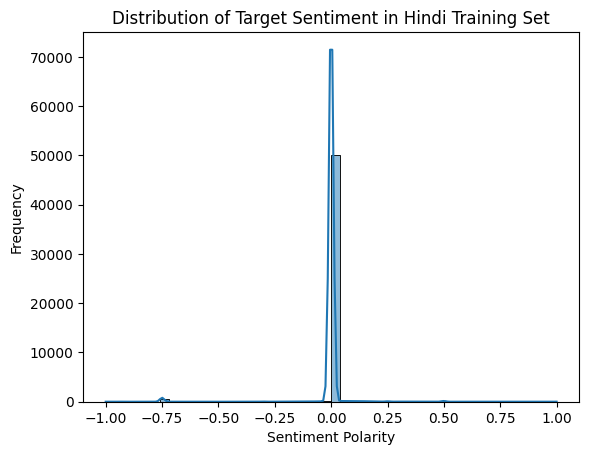

In [96]:

#performing sentiment analysis of Hindi output data in aya 


sns.histplot(hindi_train_alpaca_df['target_sentiment'], bins=50, kde=True)
plt.title('Distribution of Target Sentiment in Hindi Training Set')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()




In [ ]:
empty_text = alpaca_hindi.filter(lambda example: example['input'] is None)
empty_text

In [ ]:
empty_text = alpaca_hindi.filter(lambda example: example['instruction'] == "" or example['instruction'] is None)
empty_text

In [ ]:
empty_text = alpaca_hindi.filter(lambda example: example['output'] == "" or example['output'] is None)
empty_text

In [ ]:
avg_inst_len = sum(len(text.split()) for text in alpaca_hindi['train']['instruction']) / len(alpaca_hindi['train']['instruction'])
avg_inputs_len = sum(len(text.split()) for text in alpaca_hindi['train']['input']) / len(alpaca_hindi['train']['input'])
avg_outputs_len = sum(len(text.split()) for text in alpaca_hindi['train']['output']) / len(alpaca_hindi['train']['output'])
(avg_inst_len, avg_inputs_len, avg_outputs_len)